In [72]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [73]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 1000)

### Load Data

In [74]:
data_dir = '..\data\\'
cvadr = pd.read_parquet(data_dir + 'final_dataset.parquet')
cvadr.head(2)

,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,WEIGHT_KG,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False


In [75]:
cvadr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616282 entries, 0 to 1323890
Data columns (total 21 columns):
DRUG_NAME            616282 non-null object
MASS                 616282 non-null float64
ATC_LEVEL_2          616282 non-null object
ATC_VECTOR           616282 non-null object
TARGETS              616282 non-null object
TARGET_VECTOR        616282 non-null object
REPORT_NO            616282 non-null object
DATE_RECEIVED        616282 non-null datetime64[ns]
REPORT_TYPE          616273 non-null object
GENDER               607126 non-null object
AGE                  616282 non-null float64
SERIOUS_FLAG         616282 non-null object
REPORTER_TYPE        483900 non-null object
SOURCE               601063 non-null object
WEIGHT_KG            214360 non-null float64
ADMIN_ROUTE          590635 non-null object
DOSAGE_FORM          597596 non-null object
CONCOMITANT_DRUGS    616282 non-null float64
REACTION             616282 non-null object
SOC                  616282 non-null obj

In [76]:
# name first row as primary key
cvadr = cvadr.reset_index()
cvadr = cvadr.rename(columns={'index': 'ROW_ID'})
cvadr.head(2)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,WEIGHT_KG,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS,REACTION,SOC,SIDER
0,0,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,International normalised ratio increased,Investigations,False
1,1,BIVALIRUDIN,2180.2853,{'ANTITHROMBOTIC AGENTS': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Prothrombin': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",223127,2007-09-10,Spontaneous,Female,38.0,Not Serious,Pharmacist,MAH,NaN,Intravenous (not otherwise specified),POWDER FOR SOLUTION INTRAVENOUS,0.0,Drug ineffective,General disorders and administration site cond...,False


In [77]:
# change DATE_RECEIVED to datetime tpye
cvadr['DATE_RECEIVED'] = pd.to_datetime(cvadr['DATE_RECEIVED'] , yearfirst=True)

# fix dates in the future (these were converted to the wrong century)
cvadr['DATE_RECEIVED'] = cvadr['DATE_RECEIVED'].apply(lambda x: x if x.year < 2020 else x - pd.DateOffset(years=100))

# change categorical columsn to category data type

categorical_cols = ['REPORT_TYPE','GENDER','REPORTER_TYPE','SOURCE','ADMIN_ROUTE','DOSAGE_FORM', 'SERIOUS_FLAG']
cvadr[categorical_cols] = cvadr[categorical_cols].astype('category')

### Descriptive Stats

In [78]:
# count
# distinct count
# null count
# min/max

count = cvadr.count()
dcount = cvadr.nunique()
ncount = cvadr.isna().sum()
dtypes = cvadr.dtypes


In [87]:
desc_stats = pd.concat([count, ncount, dcount, dtypes], axis=1)
desc_stats.columns = ['count', 'empty', 'unique count', 'data type']
desc_stats['empty_%'] = desc_stats['empty']/cvadr.ROW_ID.count()*100

desc_stats.style.format({'empty_%': '{:,.2f}%'})

,count,empty,unique count,data type,empty_%
ROW_ID,616282,0,616282,int64,0.00%
DRUG_NAME,616282,0,1088,object,0.00%
MASS,616282,0,1024,float64,0.00%
ATC_LEVEL_2,616282,0,385,object,0.00%
ATC_VECTOR,616282,0,363,object,0.00%
TARGETS,616282,0,821,object,0.00%
TARGET_VECTOR,616282,0,820,object,0.00%
REPORT_NO,616282,0,207775,object,0.00%
DATE_RECEIVED,616282,0,12727,datetime64[ns],0.00%
REPORT_TYPE,616273,9,7,category,0.00%


In [80]:
desc_stats.to_csv(data_dir + 'desc_stats.csv')

In [81]:
desc_stats_numeric = cvadr.describe().round()
desc_stats_numeric.to_csv(data_dir + 'desc_stats_numeric.csv')
desc_stats_numeric

,ROW_ID,MASS,AGE,WEIGHT_KG,CONCOMITANT_DRUGS
count,616282.0,616282.0,616282.0,214360.0,616282.0
mean,685185.0,373.0,51.0,70.0,2.0
std,399451.0,212.0,22.0,23.0,3.0
min,0.0,30.0,-62.0,0.0,0.0
25%,332594.0,266.0,35.0,57.0,0.0
50%,662470.0,327.0,54.0,68.0,1.0
75%,1050270.0,415.0,68.0,82.0,3.0
max,1323890.0,5006.0,119.0,772.0,108.0


In [82]:
cvadr.isna().sum()


ROW_ID                    0
DRUG_NAME                 0
MASS                      0
ATC_LEVEL_2               0
ATC_VECTOR                0
TARGETS                   0
TARGET_VECTOR             0
REPORT_NO                 0
DATE_RECEIVED             0
REPORT_TYPE               9
GENDER                 9156
AGE                       0
SERIOUS_FLAG              0
REPORTER_TYPE        132382
SOURCE                15219
WEIGHT_KG            401922
ADMIN_ROUTE           25647
DOSAGE_FORM           18686
CONCOMITANT_DRUGS         0
REACTION                  0
SOC                       0
SIDER                     0
dtype: int64

### Handle Blanks

In [90]:
nan_col_a = ['REPORT_TYPE','GENDER','REPORTER_TYPE','SOURCE','ADMIN_ROUTE','DOSAGE_FORM']
nan_col_b = ['WEIGHT_KG']

# create unknown category for categorical columns
for i in nan_col_a:
    if('Unknown' not in cvadr[i].cat.categories):
        cvadr[i] = cvadr[i].cat.add_categories('Unknown')
        
cvadr[nan_col_a] = cvadr[nan_col_a].fillna('Unknown')

# WEIGHT_KH is the only numeric column with blanks.
# Remove column because more than half are blankd (65% empty).

cvadr = cvadr[['ROW_ID', 'DRUG_NAME', 'MASS', 'ATC_LEVEL_2', 'ATC_VECTOR',
       'TARGETS', 'TARGET_VECTOR', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'CONCOMITANT_DRUGS', 'REACTION', 'SOC', 'SIDER']]

### Univariate Plots

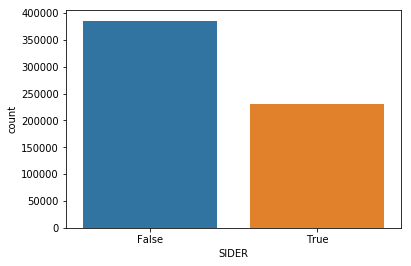

In [23]:
# count the target variable
ax = sns.countplot(x='SIDER', data=cvadr)

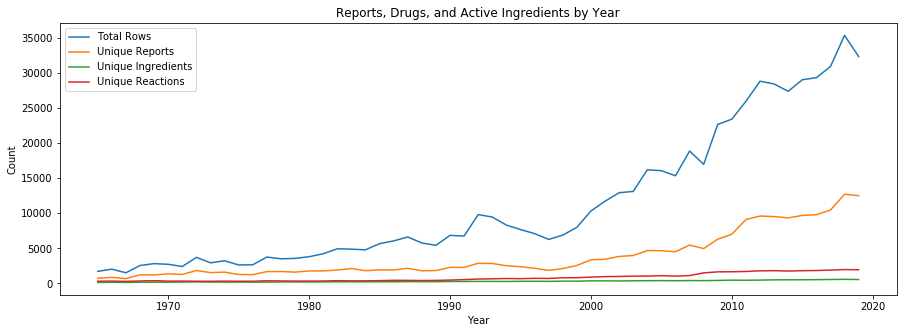

In [26]:
# count distinct reorts, drugs, and SE per year

counts_by_year = cvadr.groupby(cvadr['DATE_RECEIVED'].dt.year)['ROW_ID','REPORT_NO','DRUG_NAME','REACTION'].nunique()
counts_by_year = counts_by_year.reset_index()

#counts_by_year['DATE_RECEIVED'] = counts_by_year['DATE_RECEIVED'].apply(lambda x: x if x < 2020 else x-100)
counts_by_year.head()

# melt for plotting
counts_by_year_melt = counts_by_year.melt(id_vars='DATE_RECEIVED', value_vars=['ROW_ID','REPORT_NO','DRUG_NAME','REACTION'], var_name='VAR', value_name='COUNT')

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='DATE_RECEIVED', y='COUNT', data=counts_by_year_melt, hue='VAR', ax=ax)

plot1 = plt.xlabel('Year')
plot1 = plt.ylabel('Count')
plot1 = plt.title("Reports, Drugs, and Active Ingredients by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:5]
ax.legend(plot1_labels, ['Total Rows', 'Unique Reports','Unique Ingredients','Unique Reactions'])

plt.show()

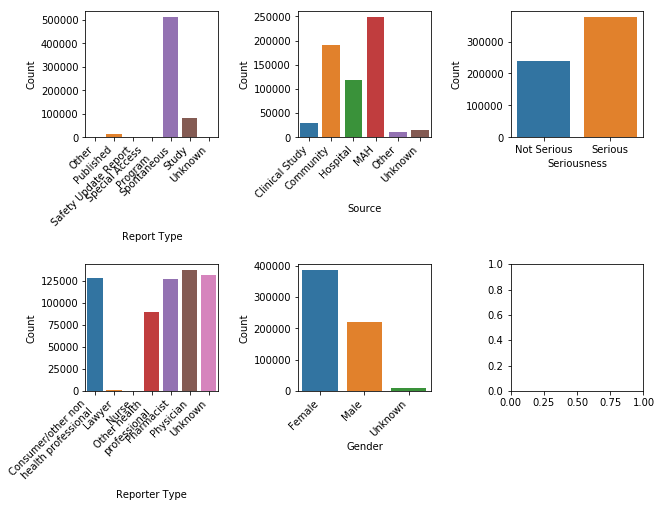

In [71]:
# plot categorical columns

import textwrap

fig, ax = plt.subplots(2,3, figsize=(10,7), sharex=False)
plt.subplots_adjust(hspace=1, wspace=.6)

plot3 = sns.countplot(x='REPORT_TYPE', data=cvadr, ax=ax[0,0])
plot3.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot3.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[0,0].set_xlabel('Report Type')
ax[0,0].set_ylabel('Count')

plot4 = sns.countplot(x='REPORTER_TYPE', data=cvadr, ax=ax[1,0])
plot4.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot4.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[1,0].set_xlabel('Reporter Type')
ax[1,0].set_ylabel('Count')

plot5 = sns.countplot(x='SOURCE', data=cvadr, ax=ax[0,1])
plot5.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot5.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[0,1].set_xlabel('Source')
ax[0,1].set_ylabel('Count')

plot6 = sns.countplot(x='GENDER', data=cvadr, ax=ax[1,1])
plot6.set_xticklabels([textwrap.fill(e.get_text(),20) for e in list(plot6.get_xticklabels())], rotation=45, horizontalalignment='right')
ax[1,1].set_xlabel('Gender')
ax[1,1].set_ylabel('Count')

plot7 = sns.countplot(x='SERIOUS_FLAG', data=cvadr, ax=ax[0,2])
ax[0,2].set_xlabel('Seriousness')
ax[0,2].set_ylabel('Count')


# Show plot
plt.show()

In [38]:
y = cvadr[['ROW_ID','REACTION','SOC']]
x = y.groupby('REACTION')['ROW_ID'].count().reset_index()
x.columns = ['REACTION', 'ROW_COUNT']
z = x.merge(y, how='left', on='REACTION')[['REACTION','SOC','ROW_COUNT']]
z = z.drop_duplicates()

soc_list = list(z.SOC.unique())
color_range = list(np.linspace(0, 1, len(soc_list), endpoint=False))
colors = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(soc_list, colors))
color_dict
color_df = pd.DataFrame.from_dict(color_dict, orient='Index', columns=['r','g', 'b', 'a']).reset_index()
color_df['rgba'] = list(zip(color_df['r'], color_df['g'], color_df['b'], color_df['a']))
color_df = color_df[['index','rgba']]
color_df.columns = ['SOC','RGBA']

# limit to top 50
z = z.merge(color_df).sort_values(by='ROW_COUNT', ascending=False).head(50)


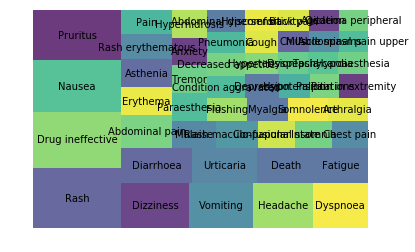

In [36]:
# libraries

import squarify    # pip install squarify (algorithm for treemap)

#norm = matplotlib.colors.Normalize(vmin=min(dataAssists.A), vmax=max(dataAssists.A))
#colors = [matplotlib.cm.Blues(norm(value)) for value in dataAssists.A]

#= pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=z['ROW_COUNT'], label=z['REACTION'], alpha=.8 )
plt.axis('off')
plt.show()


In [18]:
# tree plot of atc category
# T/F for colour




In [19]:
# tree plot for targets
# T/F for colour




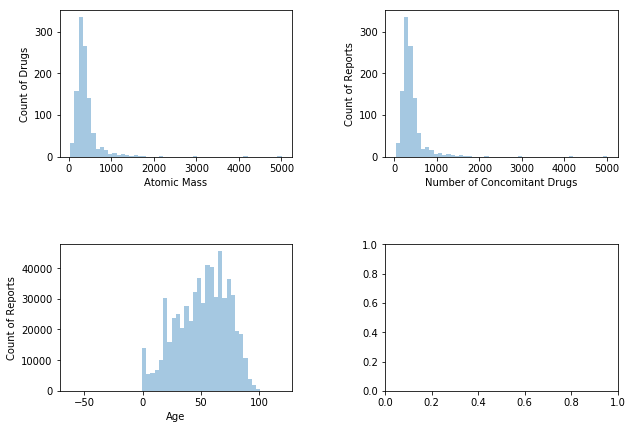

In [95]:
#  PLot distributions of numeric columns

fig, ax = plt.subplots(2,2, figsize=(10,7), sharex=False)
plt.subplots_adjust(hspace=.6, wspace=.4)


# Plot the distribution of average atomic mass

x = cvadr.drop_duplicates('DRUG_NAME')['MASS']
plot1 = sns.distplot(x, kde=False,  ax=ax[0,0])
ax[0,0].set(xlabel='Atomic Mass', ylabel='Count of Drugs')

# age
plot2 = sns.distplot(cvadr['AGE'], ax=ax[1,0], kde=False)
ax[1,0].set(xlabel='Age', ylabel='Count of Reports')

# concomitant drugs
plot4 = sns.distplot(x, axlabel='Number of Concomitant Drugs', kde=False, ax=ax[0,1])
ax[0,1].set(xlabel='Number of Concomitant Drugs', ylabel='Count of Reports')

plt.show()

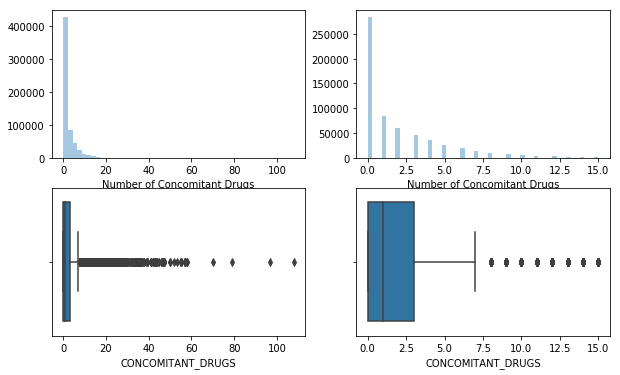

before: (611178,)
after: (616282,)


In [106]:
# remove outliers from concomitant drugs column.
# it doesn't make sense to have more than a dozen or so concomitant drugs.
# exclude observations greater than 4 standard deviations from the mean (0.1% of observations)

from scipy import stats
x = cvadr['CONCOMITANT_DRUGS']
z = np.abs(stats.zscore(x))
threshold = 4
y = x[(z < threshold)]

fig, ax = plt.subplots(2, 2, figsize=(10,6))
ax1 = sns.distplot(x, axlabel='Number of Concomitant Drugs', kde=False, ax=ax[0, 0])
ax2 = sns.distplot(y, axlabel='Number of Concomitant Drugs', kde=False, ax=ax[0, 1])
ax3 = sns.boxplot(x, ax=ax[1, 0])
ax4 = sns.boxplot(y, ax=ax[1, 1])

plt.show()

print('before:', y.shape)
print('after:', x.shape)

# remove outlier observations
cvadr = cvadr.merge(y, left_index=True, right_index=True, how='inner')

In [109]:
# remove outliers from Age column

print('before:', cvadr.shape)

# remove observations with negative age
cvadr = cvadr[cvadr['AGE']>= 0]

# remove observations with age over 122. This is the oldest recorded age. 
cvadr = cvadr[cvadr['AGE'] <= 122]

print('after:', cvadr.shape)

before: (611178, 22)
after: (611164, 22)


In [114]:
# Checked the drug wtih the higest atomic mass
# Verified that atomic mass is actaully 5135.86 g/mol g·mol−1

cvadr.sort_values(by='MASS', ascending=False).head(1)

,ROW_ID,DRUG_NAME,MASS,ATC_LEVEL_2,ATC_VECTOR,TARGETS,TARGET_VECTOR,REPORT_NO,DATE_RECEIVED,REPORT_TYPE,GENDER,AGE,SERIOUS_FLAG,REPORTER_TYPE,SOURCE,ADMIN_ROUTE,DOSAGE_FORM,CONCOMITANT_DRUGS_x,REACTION,SOC,SIDER,CONCOMITANT_DRUGS_y
580221,1278461,TESAMORELIN,5005.76,{'ANTERIOR PITUITARY LOBE HORMONES AND ANALOGU...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",{'Growth hormone-releasing hormone receptor': 1},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",721449,2018-12-12,Study,Male,62.0,Not Serious,Consumer/other non health professional,MAH,Subcutaneous,KIT,0.0,Drug ineffective,General disorders and administration site cond...,False,0.0


In [26]:
# Plot number of S/E per report and per active ingredients

se_ratio = pd.concat([counts_by_year['DATE_RECEIVED'], counts_by_year['REACTION']/counts_by_year['DRUG_NAME'], counts_by_year['REACTION']/counts_by_year['REPORT_NO']], axis=1)

se_ratio.columns = ['YEAR', 'REACTIONS_PER_INGR', 'REACTIONS_PER_REPORT']

se_ratio.head()

,YEAR,REACTIONS_PER_INGR,REACTIONS_PER_REPORT
0,1970,1.777778,0.248062
1,1971,1.685567,0.268253
2,1972,1.478261,0.172297
3,1973,1.576720,0.200403
4,1974,1.696335,0.207692


In [27]:
# melt for plotting
se_ratio_melt = se_ratio.melt(id_vars='YEAR', value_vars=['REACTIONS_PER_INGR', 'REACTIONS_PER_REPORT'], var_name='VAR', value_name='COUNT')

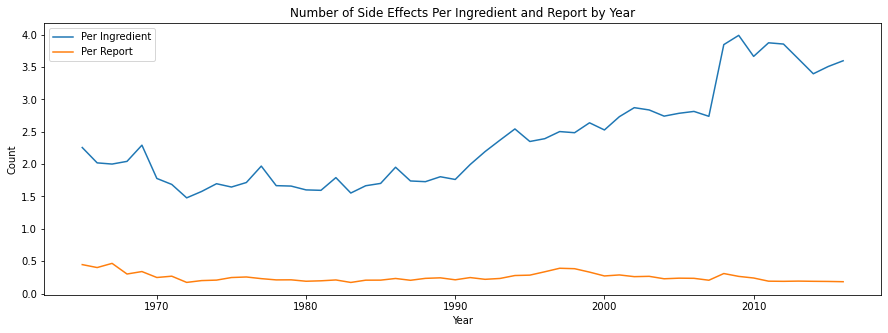

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x='YEAR', y='COUNT', data=se_ratio_melt, hue='VAR', ax=ax)

plot2 = plt.xlabel('Year')
plot2 = plt.ylabel('Count')
plot2 = plt.title("Number of Side Effects Per Ingredient and Report by Year")

plot1_labels = ax.get_legend_handles_labels()[0][1:3]
ax.legend(plot1_labels, ['Per Ingredient','Per Report'])

# fig.autofmt_xdate()

plt.show()

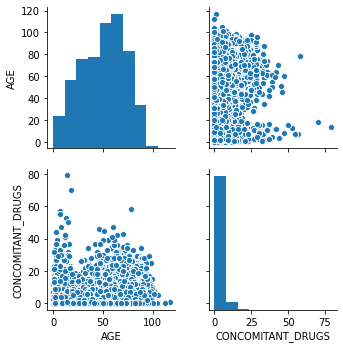

In [29]:
# there doesn't seem to be a relationship bewteen age ad concomitant drugs

cvadr1 = cvadr[['GENDER',
       'AGE', 'REPORTER_TYPE', 'SOURCE',
       'ADMIN_ROUTE', 'CONCOMITANT_DRUGS']]

sns.pairplot(cvadr1)

plt.show()

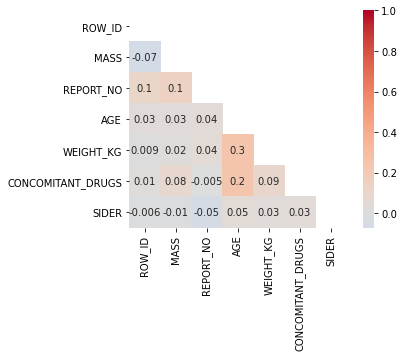

In [22]:
matrix = np.triu(cvadr.corr())

sns.heatmap(cvadr.corr(), annot = True, fmt='.1g', center= 0, cmap= 'coolwarm',square=True, mask=matrix)

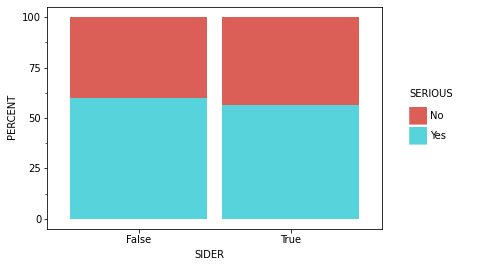

<ggplot: (-9223371941641319260)>

In [21]:
# seriousness bar chart

x = cvadr.groupby(['SIDER', 'SERIOUS_FLAG'])['ROW_ID'].count()
y = x.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
y = y.reset_index()
y.columns = ['SIDER', 'SERIOUS', 'PERCENT']

(ggplot(y, aes(x='SIDER', y='PERCENT', fill='SERIOUS'))
 + geom_col()
 + theme('seaborn')
)


In [30]:
# time series plot wtih color for outcomes

# count distinct reorts, drugs, and SE per year
# fix dates prior to 1970

outcomes_by_year = cvadr.groupby([cvadr['DATE_RECEIVED'].dt.year, 'SIDER'])['ROW_ID'].count()
outcomes_by_year = outcomes_by_year.reset_index()
outcomes_by_year['DATE_RECEIVED'] = outcomes_by_year['DATE_RECEIVED'].apply(lambda x: x if x < 2020 else x-100)
outcomes_by_year.columns = ['YEAR', 'SIDER', 'COUNT']
outcomes_by_year_1 = outcomes_by_year.pivot(index='YEAR', columns='SIDER', values='COUNT').reset_index()
outcomes_by_year_1['Positive_%'] = outcomes_by_year_1[True]/(outcomes_by_year_1[False] + outcomes_by_year_1[True])

#outcomes_by_year.columns.values

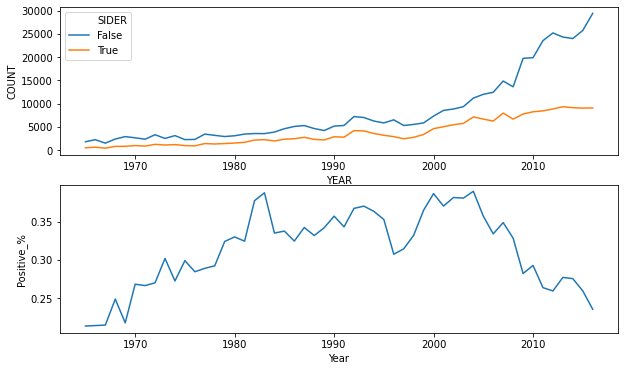

In [31]:
# melt for plotting
outcomes_by_year_melt = outcomes_by_year.melt(id_vars='YEAR', value_vars='COUNT', var_name='SIDER', value_name='COUNT')

fig, ax = plt.subplots(2,1, figsize=(10,6))

sns.lineplot(x='YEAR', y='COUNT', data=outcomes_by_year, hue='SIDER', ax=ax[0])
#sns.lineplot(x='YEAR', y=False, data=outcomes_by_year, ax=ax[0])
sns.lineplot(x='YEAR', y='Positive_%', data=outcomes_by_year_1, ax=ax[1])

plt.xlabel('Year')
#plot1 = plt.ylabel('Count')
#plot1 = plt.title("Outcomes by Year")

#plot1_labels = ax.get_legend_handles_labels()[0][1:5]
#ax.legend(plot1_labels, ['Unique Reports','Unique Ingredients','Unique Side Effects', 'Total Rows'])

plt.show()

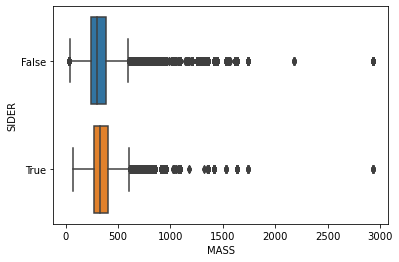

In [32]:
# box and whisker plot for mass


sns.boxplot(x='MASS', y='SIDER', data=cvadr, orient='h')
plt.show()

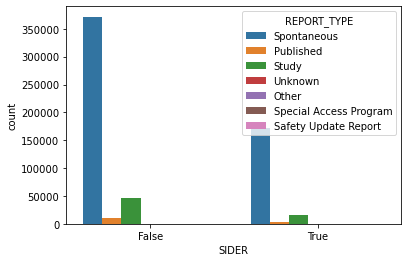

In [33]:
# report type

sns.countplot(x='SIDER', hue='REPORT_TYPE', data=cvadr)
plt.show()

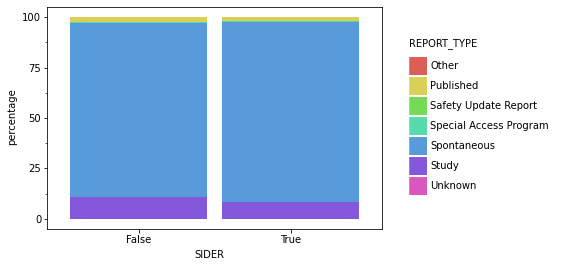

<ggplot: (-9223371941659629812)>

In [34]:
x = cvadr.groupby(['SIDER'])['REPORT_TYPE']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()

(ggplot(z, aes(x='SIDER', y='percentage', fill='REPORT_TYPE'))
 + geom_col()
 + theme('seaborn')
)


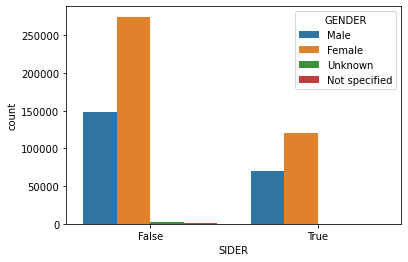

In [35]:
# scatter plot/box and whisker plot for gender

sns.countplot(x='SIDER', hue='GENDER', data=cvadr)
plt.show()

In [36]:
x = cvadr.groupby(['SIDER'])['GENDER']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()
#m = z.melt(id_vars=['SIDER','GENDER'], value_vars=['counts', 'percentage'])


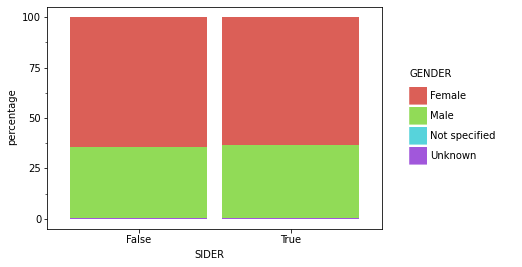

<ggplot: (-9223371941636699276)>

In [37]:


(ggplot(z, aes(x='SIDER', y='percentage', fill='GENDER'))
 + geom_col()
 + theme('seaborn')
)


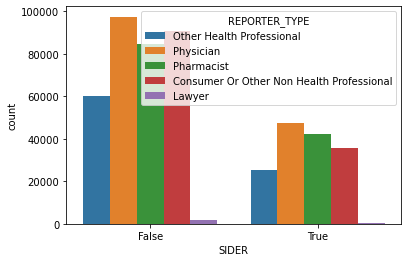

In [38]:
# scatter plot/box and whisker plot for reporter type

sns.countplot(x='SIDER', hue='REPORTER_TYPE', data=cvadr)
plt.show()

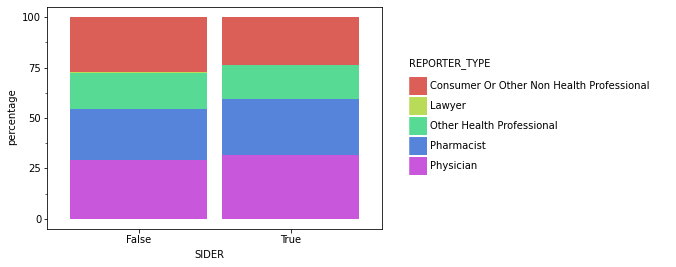

<ggplot: (-9223371941636710116)>

In [39]:
x = cvadr.groupby(['SIDER'])['REPORTER_TYPE']
y = pd.concat([x.value_counts(), x.value_counts(normalize=True).mul(100)], keys=('counts','percentage'), axis=1)
z = y.reset_index()

(ggplot(z, aes(x='SIDER', y='percentage', fill='REPORTER_TYPE'))
 + geom_col()
 + theme('seaborn')
)


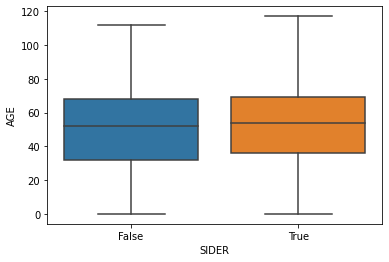

In [40]:
# scatter plot/box  for age with outcome as colour
x = cvadr[cvadr['AGE']>0]
# ax = sns.stripplot(x='SIDER', y='AGE', data=x, jitter=0.2)
ax = sns.boxplot(x='SIDER', y='AGE', data=x)

In [41]:
cvadr.columns.values

array(['ROW_ID', 'DRUG_NAME', 'MASS', 'ATC_LEVEL_2', 'ATC_VECTOR',
       'TARGETS', 'TARGET_VECTOR', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'WEIGHT_KG', 'INVOLVEMENT', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'CONCOMITANT_DRUGS', 'ACTIVE_INGREDIENT', 'REACTION', 'SOC',
       'SIDER'], dtype=object)

In [42]:
# reporter type: scatter plot with reporter type as colour; mosaic plot

In [43]:
# source: scatter plot with reporter type as colour; mosaic plot

In [44]:
# weight: box and whisker

In [45]:
# admin route: scatter plot with dosage as color

In [46]:
# dosage form: scatter plot with dosage as color

In [47]:
# concomitant drugs: scattter plot

### Feature Selection

In [48]:
cvadr.columns.values

array(['ROW_ID', 'DRUG_NAME', 'MASS', 'ATC_LEVEL_2', 'ATC_VECTOR',
       'TARGETS', 'TARGET_VECTOR', 'REPORT_NO', 'DATE_RECEIVED',
       'REPORT_TYPE', 'GENDER', 'AGE', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'WEIGHT_KG', 'INVOLVEMENT', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'CONCOMITANT_DRUGS', 'ACTIVE_INGREDIENT', 'REACTION', 'SOC',
       'SIDER'], dtype=object)

In [133]:
categorical_cols_min = ['REPORT_TYPE', 'GENDER', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'REACTION', 'SOC'] # excluded targets and atc

categorical_cols_min_norxn = ['REPORT_TYPE', 'GENDER', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'ADMIN_ROUTE', 'DOSAGE_FORM',
        'SOC'] # excluded targets and atc

categorical_cols_all = ['REPORT_TYPE', 'GENDER', 'SERIOUS_FLAG', 'REPORTER_TYPE',
       'SOURCE', 'INVOLVEMENT', 'ADMIN_ROUTE', 'DOSAGE_FORM',
       'REACTION', 'SOC', 'ATC_VECTOR', 'TARGET_VECTOR'] # excluded targets and atc

numeric_cols = ['MASS', 'AGE', 'WEIGHT_KG', 
       'CONCOMITANT_DRUGS']

In [134]:
cvadr[categorical_cols_min].count()

REPORT_TYPE      500305
GENDER           500305
SERIOUS_FLAG     500305
REPORTER_TYPE    500305
SOURCE           500305
ADMIN_ROUTE      500305
DOSAGE_FORM      500305
REACTION         500305
SOC              500305
dtype: int64

In [135]:
cvadr[categorical_cols_min].isna().sum()

REPORT_TYPE      0
GENDER           0
SERIOUS_FLAG     0
REPORTER_TYPE    0
SOURCE           0
ADMIN_ROUTE      0
DOSAGE_FORM      0
REACTION         0
SOC              0
dtype: int64

In [136]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
#label_encoder = LabelEncoder()
categor_min_encoded = pd.get_dummies(cvadr[categorical_cols_min_norxn])

In [137]:
categor_min_encoded.head()

,REPORT_TYPE_Spontaneous,REPORT_TYPE_Study,REPORT_TYPE_Unknown,REPORT_TYPE_Special Access Program,REPORT_TYPE_Published,REPORT_TYPE_Safety Update Report,REPORT_TYPE_Other,GENDER_Female,GENDER_Male,GENDER_Unknown,GENDER_Not specified,SERIOUS_FLAG_No,SERIOUS_FLAG_Yes,REPORTER_TYPE_Consumer Or Other Non Health Professional,REPORTER_TYPE_Other Health Professional,REPORTER_TYPE_Pharmacist,REPORTER_TYPE_Physician,REPORTER_TYPE_Lawyer,REPORTER_TYPE_Nurse,REPORTER_TYPE_Unknown,SOURCE_Community,SOURCE_Hospital,SOURCE_MAH,SOURCE_Other,SOURCE_Clinical Study,SOURCE_Unknown,ADMIN_ROUTE_Auricular (otic),ADMIN_ROUTE_Buccal,ADMIN_ROUTE_Cutaneous,ADMIN_ROUTE_Dental,ADMIN_ROUTE_Endocervical,ADMIN_ROUTE_Endosinusial,ADMIN_ROUTE_Epidural,ADMIN_ROUTE_Feeding tube,ADMIN_ROUTE_Gastroenteral use,ADMIN_ROUTE_Hemodialysis,ADMIN_ROUTE_Inhalation,ADMIN_ROUTE_Intra corpus cavernosum,ADMIN_ROUTE_Intra-amniotic,ADMIN_ROUTE_Intra-arterial,ADMIN_ROUTE_Intra-articular,ADMIN_ROUTE_Intra-nasal,ADMIN_ROUTE_Intra-uterine,ADMIN_ROUTE_Intracardiac,ADMIN_ROUTE_Intracavernous,ADMIN_ROUTE_Intracervical,ADMIN_ROUTE_Intracoronary,ADMIN_ROUTE_Intradermal,ADMIN_ROUTE_Intradiscal (Intraspinal),ADMIN_ROUTE_Intramuscular,ADMIN_ROUTE_Intraocular,ADMIN_ROUTE_Intrapericardial,ADMIN_ROUTE_Intraperitoneal,ADMIN_ROUTE_Intrapleural,ADMIN_ROUTE_Intrathecal,ADMIN_ROUTE_Intratracheal,ADMIN_ROUTE_Intravenous (not otherwise specified),ADMIN_ROUTE_Intravenous bolus,ADMIN_ROUTE_Intravenous drip,ADMIN_ROUTE_Intravesical,ADMIN_ROUTE_Irrigation,ADMIN_ROUTE_Local infiltration,ADMIN_ROUTE_Occlusive dressing technique,ADMIN_ROUTE_Ophthalmic,ADMIN_ROUTE_Oral,ADMIN_ROUTE_Oropharingeal,ADMIN_ROUTE_Other,ADMIN_ROUTE_Parenteral,ADMIN_ROUTE_Rectal,ADMIN_ROUTE_Subcutaneous,ADMIN_ROUTE_Subdermal,ADMIN_ROUTE_Subdural,ADMIN_ROUTE_Sublingual,ADMIN_ROUTE_Systemic,ADMIN_ROUTE_Topical,ADMIN_ROUTE_Transdermal,ADMIN_ROUTE_Transmammary,ADMIN_ROUTE_Transplacental,ADMIN_ROUTE_Unknown,ADMIN_ROUTE_Urethral,ADMIN_ROUTE_Vaginal,DOSAGE_FORM_AEROSOL,DOSAGE_FORM_AEROSOL (WITH PROPELLANTS),"DOSAGE_FORM_AEROSOL, FOAM","DOSAGE_FORM_AEROSOL, METERED DOSE",DOSAGE_FORM_CAPSULE,DOSAGE_FORM_CAPSULE (IMMEDIATE AND DELAYED RELEASE),DOSAGE_FORM_CAPSULE (IMMEDIATE AND EXTENDED RELEASE),"DOSAGE_FORM_CAPSULE, DELAYED RELEASE","DOSAGE_FORM_CAPSULE, DELAYED-RELEASE","DOSAGE_FORM_CAPSULE, ENTERIC-COATED","DOSAGE_FORM_CAPSULE, EXTENDED RELEASE","DOSAGE_FORM_CAPSULE, SUSTAINED-RELEASE",DOSAGE_FORM_CREAM,"DOSAGE_FORM_Capsule, soft",DOSAGE_FORM_DISC (EXTENDED-RELEASE),DOSAGE_FORM_DROPS,DOSAGE_FORM_DROPS NASAL,DOSAGE_FORM_DROPS OPHTHALMIC,DOSAGE_FORM_DROPS ORAL,DOSAGE_FORM_DROPS OTIC,DOSAGE_FORM_ELIXIR,DOSAGE_FORM_EMULSION,DOSAGE_FORM_ENEMA,DOSAGE_FORM_Eye drops,"DOSAGE_FORM_FILM, SOLUBLE",DOSAGE_FORM_GAS FOR INHALATION,DOSAGE_FORM_GEL,DOSAGE_FORM_GRANULATE,DOSAGE_FORM_GRANULE FOR SUSPENSION,"DOSAGE_FORM_GRANULE FOR SUSPENSION, DELAYED RELEASE","DOSAGE_FORM_GRANULES FOR SUSPENSION,EXTENDED RELEASE",DOSAGE_FORM_GUM,DOSAGE_FORM_IMPLANT,DOSAGE_FORM_INHALATION,DOSAGE_FORM_INJECTION,DOSAGE_FORM_INSERT,DOSAGE_FORM_INSERT (EXTENDED-RELEASE),DOSAGE_FORM_KIT,DOSAGE_FORM_LIPOSOMAL,DOSAGE_FORM_LIQUID,DOSAGE_FORM_LIQUID BLOCK/INFILTRATION,DOSAGE_FORM_LIQUID DENTAL,DOSAGE_FORM_LIQUID DIALYSIS,DOSAGE_FORM_LIQUID EPIDURAL,DOSAGE_FORM_LIQUID INHALATION,DOSAGE_FORM_LIQUID INTRA-ARTERIAL,DOSAGE_FORM_LIQUID INTRACAVITY,DOSAGE_FORM_LIQUID INTRAMUSCULAR,DOSAGE_FORM_LIQUID INTRAVENOUS,DOSAGE_FORM_LIQUID OPHTHALMIC,DOSAGE_FORM_LIQUID ORAL,DOSAGE_FORM_LIQUID OTIC,DOSAGE_FORM_LIQUID SUBCUTANEOUS,DOSAGE_FORM_LIQUID SUBLINGUAL,DOSAGE_FORM_LIQUID TOPICAL,DOSAGE_FORM_LOTION,DOSAGE_FORM_LOZENGE,DOSAGE_FORM_METERED-DOSE (AEROSOL),DOSAGE_FORM_METERED-DOSE (PUMP),DOSAGE_FORM_NOT SPECIFIED,DOSAGE_FORM_OINTMENT,DOSAGE_FORM_OINTMENT OPHTHALMIC,DOSAGE_FORM_OINTMENT RECTAL,DOSAGE_FORM_OINTMENT TOPICAL,DOSAGE_FORM_OINTMENT VAGINAL,DOSAGE_FORM_OVULES,DOSAGE_FORM_PACKAGE,DOSAGE_FORM_PAD,DOSAGE_FORM_PASTE,DOSAGE_FORM_PATCH,"DOSAGE_FORM_PATCH, EXTENDED RELEASE","DOSAGE_FORM_PIECE, CHE

In [138]:
categor_min_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500305 entries, 0 to 500304
Columns: 265 entries, REPORT_TYPE_Spontaneous to SOC_Social circumstances
dtypes: uint8(265)
memory usage: 126.4 MB


In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = categor_min_encoded  #independent columns
y = cvadr['SIDER']    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfpvalues = pd.DataFrame(fit.pvalues_)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, dfpvalues],axis=1)
featureScores.columns = ['Specs','Score', 'p-Value']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

                                                 Specs        Score  \
245  SOC_General disorders and administration site ...  4267.911217   
156                                 DOSAGE_FORM_POWDER  2852.813978   
249  SOC_Injury, poisoning and procedural complicat...  2483.269322   
250                                 SOC_Investigations  2416.008150   
244                     SOC_Gastrointestinal disorders  2079.071732   
..                                                 ...          ...   
3                   REPORT_TYPE_Special Access Program    45.812906   
115                              DOSAGE_FORM_INJECTION    45.351911   
29                                  ADMIN_ROUTE_Dental    44.751982   
116                                 DOSAGE_FORM_INSERT    42.744236   
239                              SOC_Cardiac disorders    42.345541   

          p-Value  
245  0.000000e+00  
156  0.000000e+00  
249  0.000000e+00  
250  0.000000e+00  
244  0.000000e+00  
..            ...  
3    1.

In [156]:
cvadr_cat_min = categor_min_encoded[dfcolumns[0].to_list()[0:100]]

In [157]:
dfcolumns.shape

(265, 1)

In [158]:
cvadr_cat_min.shape

(500305, 100)

In [159]:
cvadr_cat_min.head()

,REPORT_TYPE_Spontaneous,REPORT_TYPE_Study,REPORT_TYPE_Unknown,REPORT_TYPE_Special Access Program,REPORT_TYPE_Published,REPORT_TYPE_Safety Update Report,REPORT_TYPE_Other,GENDER_Female,GENDER_Male,GENDER_Unknown,GENDER_Not specified,SERIOUS_FLAG_No,SERIOUS_FLAG_Yes,REPORTER_TYPE_Consumer Or Other Non Health Professional,REPORTER_TYPE_Other Health Professional,REPORTER_TYPE_Pharmacist,REPORTER_TYPE_Physician,REPORTER_TYPE_Lawyer,REPORTER_TYPE_Nurse,REPORTER_TYPE_Unknown,SOURCE_Community,SOURCE_Hospital,SOURCE_MAH,SOURCE_Other,SOURCE_Clinical Study,SOURCE_Unknown,ADMIN_ROUTE_Auricular (otic),ADMIN_ROUTE_Buccal,ADMIN_ROUTE_Cutaneous,ADMIN_ROUTE_Dental,ADMIN_ROUTE_Endocervical,ADMIN_ROUTE_Endosinusial,ADMIN_ROUTE_Epidural,ADMIN_ROUTE_Feeding tube,ADMIN_ROUTE_Gastroenteral use,ADMIN_ROUTE_Hemodialysis,ADMIN_ROUTE_Inhalation,ADMIN_ROUTE_Intra corpus cavernosum,ADMIN_ROUTE_Intra-amniotic,ADMIN_ROUTE_Intra-arterial,ADMIN_ROUTE_Intra-articular,ADMIN_ROUTE_Intra-nasal,ADMIN_ROUTE_Intra-uterine,ADMIN_ROUTE_Intracardiac,ADMIN_ROUTE_Intracavernous,ADMIN_ROUTE_Intracervical,ADMIN_ROUTE_Intracoronary,ADMIN_ROUTE_Intradermal,ADMIN_ROUTE_Intradiscal (Intraspinal),ADMIN_ROUTE_Intramuscular,ADMIN_ROUTE_Intraocular,ADMIN_ROUTE_Intrapericardial,ADMIN_ROUTE_Intraperitoneal,ADMIN_ROUTE_Intrapleural,ADMIN_ROUTE_Intrathecal,ADMIN_ROUTE_Intratracheal,ADMIN_ROUTE_Intravenous (not otherwise specified),ADMIN_ROUTE_Intravenous bolus,ADMIN_ROUTE_Intravenous drip,ADMIN_ROUTE_Intravesical,ADMIN_ROUTE_Irrigation,ADMIN_ROUTE_Local infiltration,ADMIN_ROUTE_Occlusive dressing technique,ADMIN_ROUTE_Ophthalmic,ADMIN_ROUTE_Oral,ADMIN_ROUTE_Oropharingeal,ADMIN_ROUTE_Other,ADMIN_ROUTE_Parenteral,ADMIN_ROUTE_Rectal,ADMIN_ROUTE_Subcutaneous,ADMIN_ROUTE_Subdermal,ADMIN_ROUTE_Subdural,ADMIN_ROUTE_Sublingual,ADMIN_ROUTE_Systemic,ADMIN_ROUTE_Topical,ADMIN_ROUTE_Transdermal,ADMIN_ROUTE_Transmammary,ADMIN_ROUTE_Transplacental,ADMIN_ROUTE_Unknown,ADMIN_ROUTE_Urethral,ADMIN_ROUTE_Vaginal,DOSAGE_FORM_AEROSOL,DOSAGE_FORM_AEROSOL (WITH PROPELLANTS),"DOSAGE_FORM_AEROSOL, FOAM","DOSAGE_FORM_AEROSOL, METERED DOSE",DOSAGE_FORM_CAPSULE,DOSAGE_FORM_CAPSULE (IMMEDIATE AND DELAYED RELEASE),DOSAGE_FORM_CAPSULE (IMMEDIATE AND EXTENDED RELEASE),"DOSAGE_FORM_CAPSULE, DELAYED RELEASE","DOSAGE_FORM_CAPSULE, DELAYED-RELEASE","DOSAGE_FORM_CAPSULE, ENTERIC-COATED","DOSAGE_FORM_CAPSULE, EXTENDED RELEASE","DOSAGE_FORM_CAPSULE, SUSTAINED-RELEASE",DOSAGE_FORM_CREAM,"DOSAGE_FORM_Capsule, soft",DOSAGE_FORM_DISC (EXTENDED-RELEASE),DOSAGE_FORM_DROPS,DOSAGE_FORM_DROPS NASAL,DOSAGE_FORM_DROPS OPHTHALMIC,DOSAGE_FORM_DROPS ORAL
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ready for modeling

In [ ]:
import researchpy as rp

In [ ]:
# rp.summary_cat(cvadr[categorical_cols])

In [ ]:
cvadr['SIDER'] = np.where(cvadr['SIDER']==True, 1, 0)


In [ ]:
# chi-square test on REPORT_TYPE

x = 'REPORT_TYPE'
y = 'SIDER'

crosstab = pd.crosstab(cvadr[x], cvadr[y])
crosstab

In [ ]:
stats.chi2_contingency(crosstab)

In [ ]:
dummies = pd.get_dummies(cvadr[x]) # one hot encode

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], cvadr[y])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

In [ ]:
cvadr.head()

In [ ]:
# chi-square test on GENDER

x = 'GENDER'
y = 'SIDER'

crosstab = pd.crosstab(cvadr[x], cvadr[y])
crosstab

In [ ]:
stats.chi2_contingency(crosstab)


In [ ]:
dummies = pd.get_dummies(cvadr[x]) # one hot encode

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], cvadr[y])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

In [ ]:
# chi-square test on Seriousness Flag

x = 'SERIOUS_FLAG'
y = 'SIDER'

crosstab = pd.crosstab(cvadr[x], cvadr[y])
crosstab

In [ ]:
stats.chi2_contingency(crosstab)


In [ ]:
dummies = pd.get_dummies(cvadr[x]) # one hot encode

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], cvadr[y])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

In [ ]:
# chi-square test on Seriousness Flag

x = 'REPORTER_TYPE'
y = 'SIDER'

crosstab = pd.crosstab(cvadr[x], cvadr[y])
crosstab

In [ ]:
stats.chi2_contingency(crosstab)

In [ ]:
dummies = pd.get_dummies(cvadr[x]) # one hot encode

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], cvadr[y])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

In [ ]:
# chi-square test on Administration Route

x = 'ADMIN_ROUTE'
y = 'SIDER'

crosstab = pd.crosstab(cvadr[x], cvadr[y])
crosstab

In [ ]:
stats.chi2_contingency(crosstab)

In [ ]:
dummies = pd.get_dummies(cvadr[x]) # one hot encode

result_df = pd.DataFrame(columns=['variable','chi2','p','df'])

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], cvadr[y])
    #print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    
    new_df = pd.DataFrame([series,chi2,p,dof]).T
    new_df.columns = 'variable','chi2','p','df'
    
    result_df = pd.concat([result_df, new_df], ignore_index=True)
    #print([series,chi2,p,dof])
    #print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    

In [ ]:
#result_df

In [ ]:
# not significant
result_df[result_df['p']>0.05]


In [ ]:
# significant 
result_df[result_df['p']<=0.05]


In [ ]:
# chi-square test on ATC
x = 'ATC_VECTOR'
y = 'SIDER'

crosstab = pd.crosstab(cvadr[x], cvadr[y])
crosstab

In [ ]:
stats.chi2_contingency(crosstab)

In [ ]:
dummies = pd.get_dummies(cvadr[x]) # one hot encode

result_df = pd.DataFrame(columns=['variable','chi2','p','df'])

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], cvadr[y])
    #print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    
    new_df = pd.DataFrame([series,chi2,p,dof]).T
    new_df.columns = 'variable','chi2','p','df'
    
    result_df = pd.concat([result_df, new_df], ignore_index=True)
    #print([series,chi2,p,dof])
    #print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
    

In [ ]:
# significant 
result_df[result_df['p']<=0.05]


In [ ]:
# not significant
result_df[result_df['p']>0.05]


In [ ]:
# Anova
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [58]:
# Create features and target
X = cvadr[numeric_cols]
y = cvadr['SIDER']

MASS                      0
AGE                       0
WEIGHT_KG            399588
CONCOMITANT_DRUGS         0
dtype: int64

In [18]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

NameError: name 'X' is not defined

In [62]:
X.head(2)

,MASS,AGE,WEIGHT_KG,CONCOMITANT_DRUGS
0,2180.2853,76.0,74.000000,1.0
1,2180.2853,53.0,68.795095,6.0


In [64]:
X_kbest

array([[76. ,  1. ],
       [53. ,  6. ],
       [53. ,  6. ],
       ...,
       [ 1.5,  0. ],
       [ 1.5,  0. ],
       [ 1.5,  0. ]])

In [65]:
fvalue_selector.scores_

array([  99.1585551 , 1273.58986081,  189.35135651,  719.73506365])

In [66]:
fvalue_selector.pvalues_

array([2.34014285e-023, 1.18967585e-278, 4.46923357e-043, 1.88264959e-158])

### Modeling

In [172]:
# for testing purposes, keep only the the most recent year for now. 

cvadr_last5 = cvadr[cvadr['DATE_RECEIVED'].dt.year > 2015 ]
cvadr_last5.shape


(30990, 22)

In [169]:
# Convert dataframe to array

# Labels are the values we want to predict
y = np.array(cvadr_last5['SIDER'])

# Remove the labels from the features
# axis 1 refers to the columns

#features= cvadr.drop('SIDER', axis = 1)

# try this first. Add in categorical min columns
X = cvadr_last5[numeric_cols].merge(cvadr_cat_min, left_index=True, right_index=True, how='left') 

# Saving feature names for later use
X_labels = list(X.columns)

# Convert to numpy array
X = np.array(X)

In [173]:
# split into training and testing sets

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [174]:
# check the training and testing sets
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (23242, 104)
Training Labels Shape: (23242,)
Testing Features Shape: (7748, 104)
Testing Labels Shape: (7748,)


In [175]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the classifier
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [185]:
# Print the name and gini importance of each feature
pd.DataFrame(zip(X_labels, rf.feature_importances_)).sort_values(by=1, ascending=False).head(20)

,0,1
1,AGE,0.272347
0,MASS,0.268763
3,CONCOMITANT_DRUGS,0.103520
2,WEIGHT_KG,0.091180
89,DOSAGE_FORM_CAPSULE,0.023342
24,SOURCE_Community,0.016595
5,REPORT_TYPE_Study,0.015010
4,REPORT_TYPE_Spontaneous,0.014132
68,ADMIN_ROUTE_Oral,0.012964
26,SOURCE_MAH,0.012805


In [177]:
# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

### Evaluate the Model

In [178]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion matrix
confusion_matrix(y_test,y_predict)

array([[4552,  901],
       [1312,  983]], dtype=int64)

In [179]:
# F1 values
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n       False       0.78      0.83      0.80      5453\n        True       0.52      0.43      0.47      2295\n\n    accuracy                           0.71      7748\n   macro avg       0.65      0.63      0.64      7748\nweighted avg       0.70      0.71      0.71      7748\n'

In [180]:
# accuracy
accuracy_score(y_test, y_predict)

0.7143779039752194

In [181]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[4552  901]
 [1312  983]]


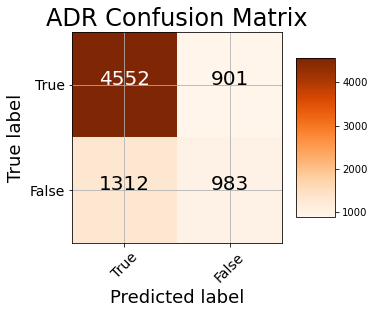

In [182]:
cm = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(cm, classes = ['True','False'],
                      title = 'ADR Confusion Matrix')